Как я понял задачу:
- прежде чем строить модели ML, на этапе EDA опеределим значимые признаки(мне надо определить призначи которые наиболее вероятно влияют на метку класса и строить модели ML для этих признаков, (когда я выберу значимые признаки - я как бы уменьшу размерность данных))
- разобраться что значит - работа с несбалансированными данными и че там вообще не сбалансированно
- Построим все 4 модели ML, в каждой посчитаем метрики - потом сравним все 4 модели ML и выберем лучшую

In [1]:
# Проведем EDA для датасета diabetes.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')

print(df.head())
print("-------------------------------------------------")
print(df.describe())
print("-------------------------------------------------")
print(df.info())

# Pregnancies - Беременности
# SkinThickness - Толщина кожи
# BMI - Индекс массы тела
# DiabetesPedigreeFunction - генетический риск развития сахарного диабета


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
-------------------------------------------------
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.9

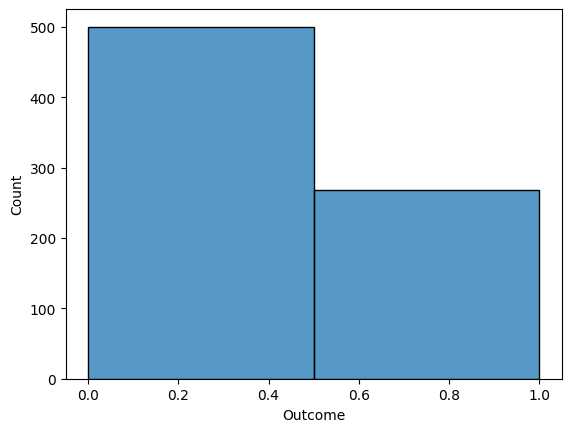

In [2]:

# Посмотрими на распределение целевой переменной
sns.histplot(df['Outcome'], bins=2)
plt.show()


## INFO:
# Преобладает диагностирование отсутствия диабета


In [3]:
# В столбцах Glucose BloodPressure SkinThickness Insulin BMI - имеются нулевые значения
# Заполним эти значения значениями median


features_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for feature in features_with_zeros:
    # Вычисляем медиану только по ненулевым значениям
    median_val = df.loc[df[feature] != 0, feature].median()
    # Заменяем нули на эту медиану
    df[feature] = df[feature].replace(0, median_val)


print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

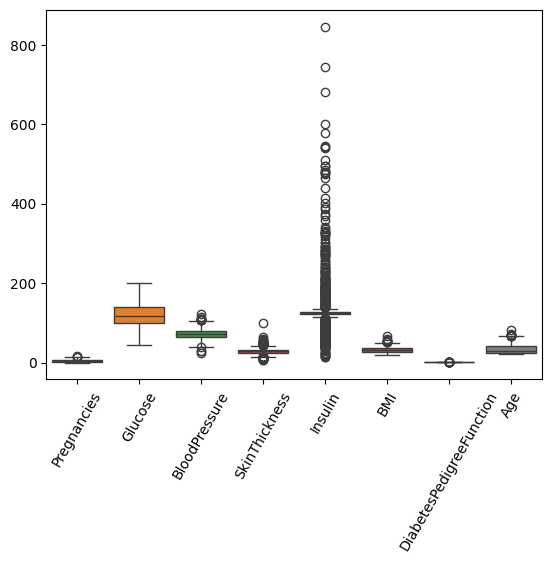

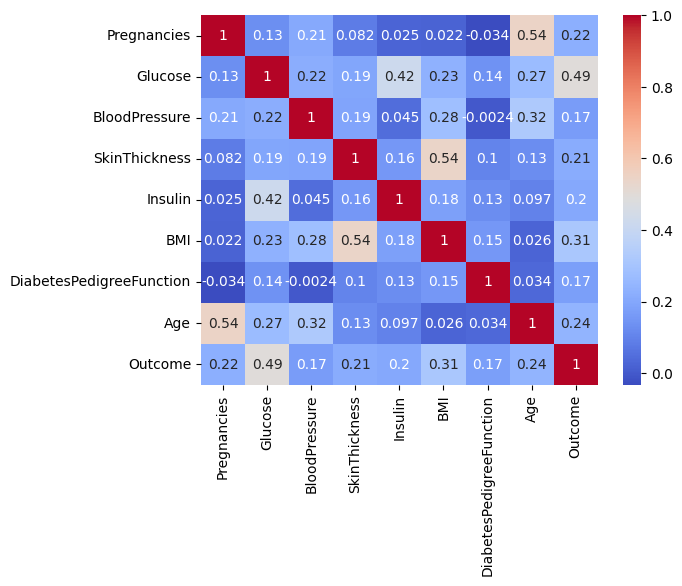

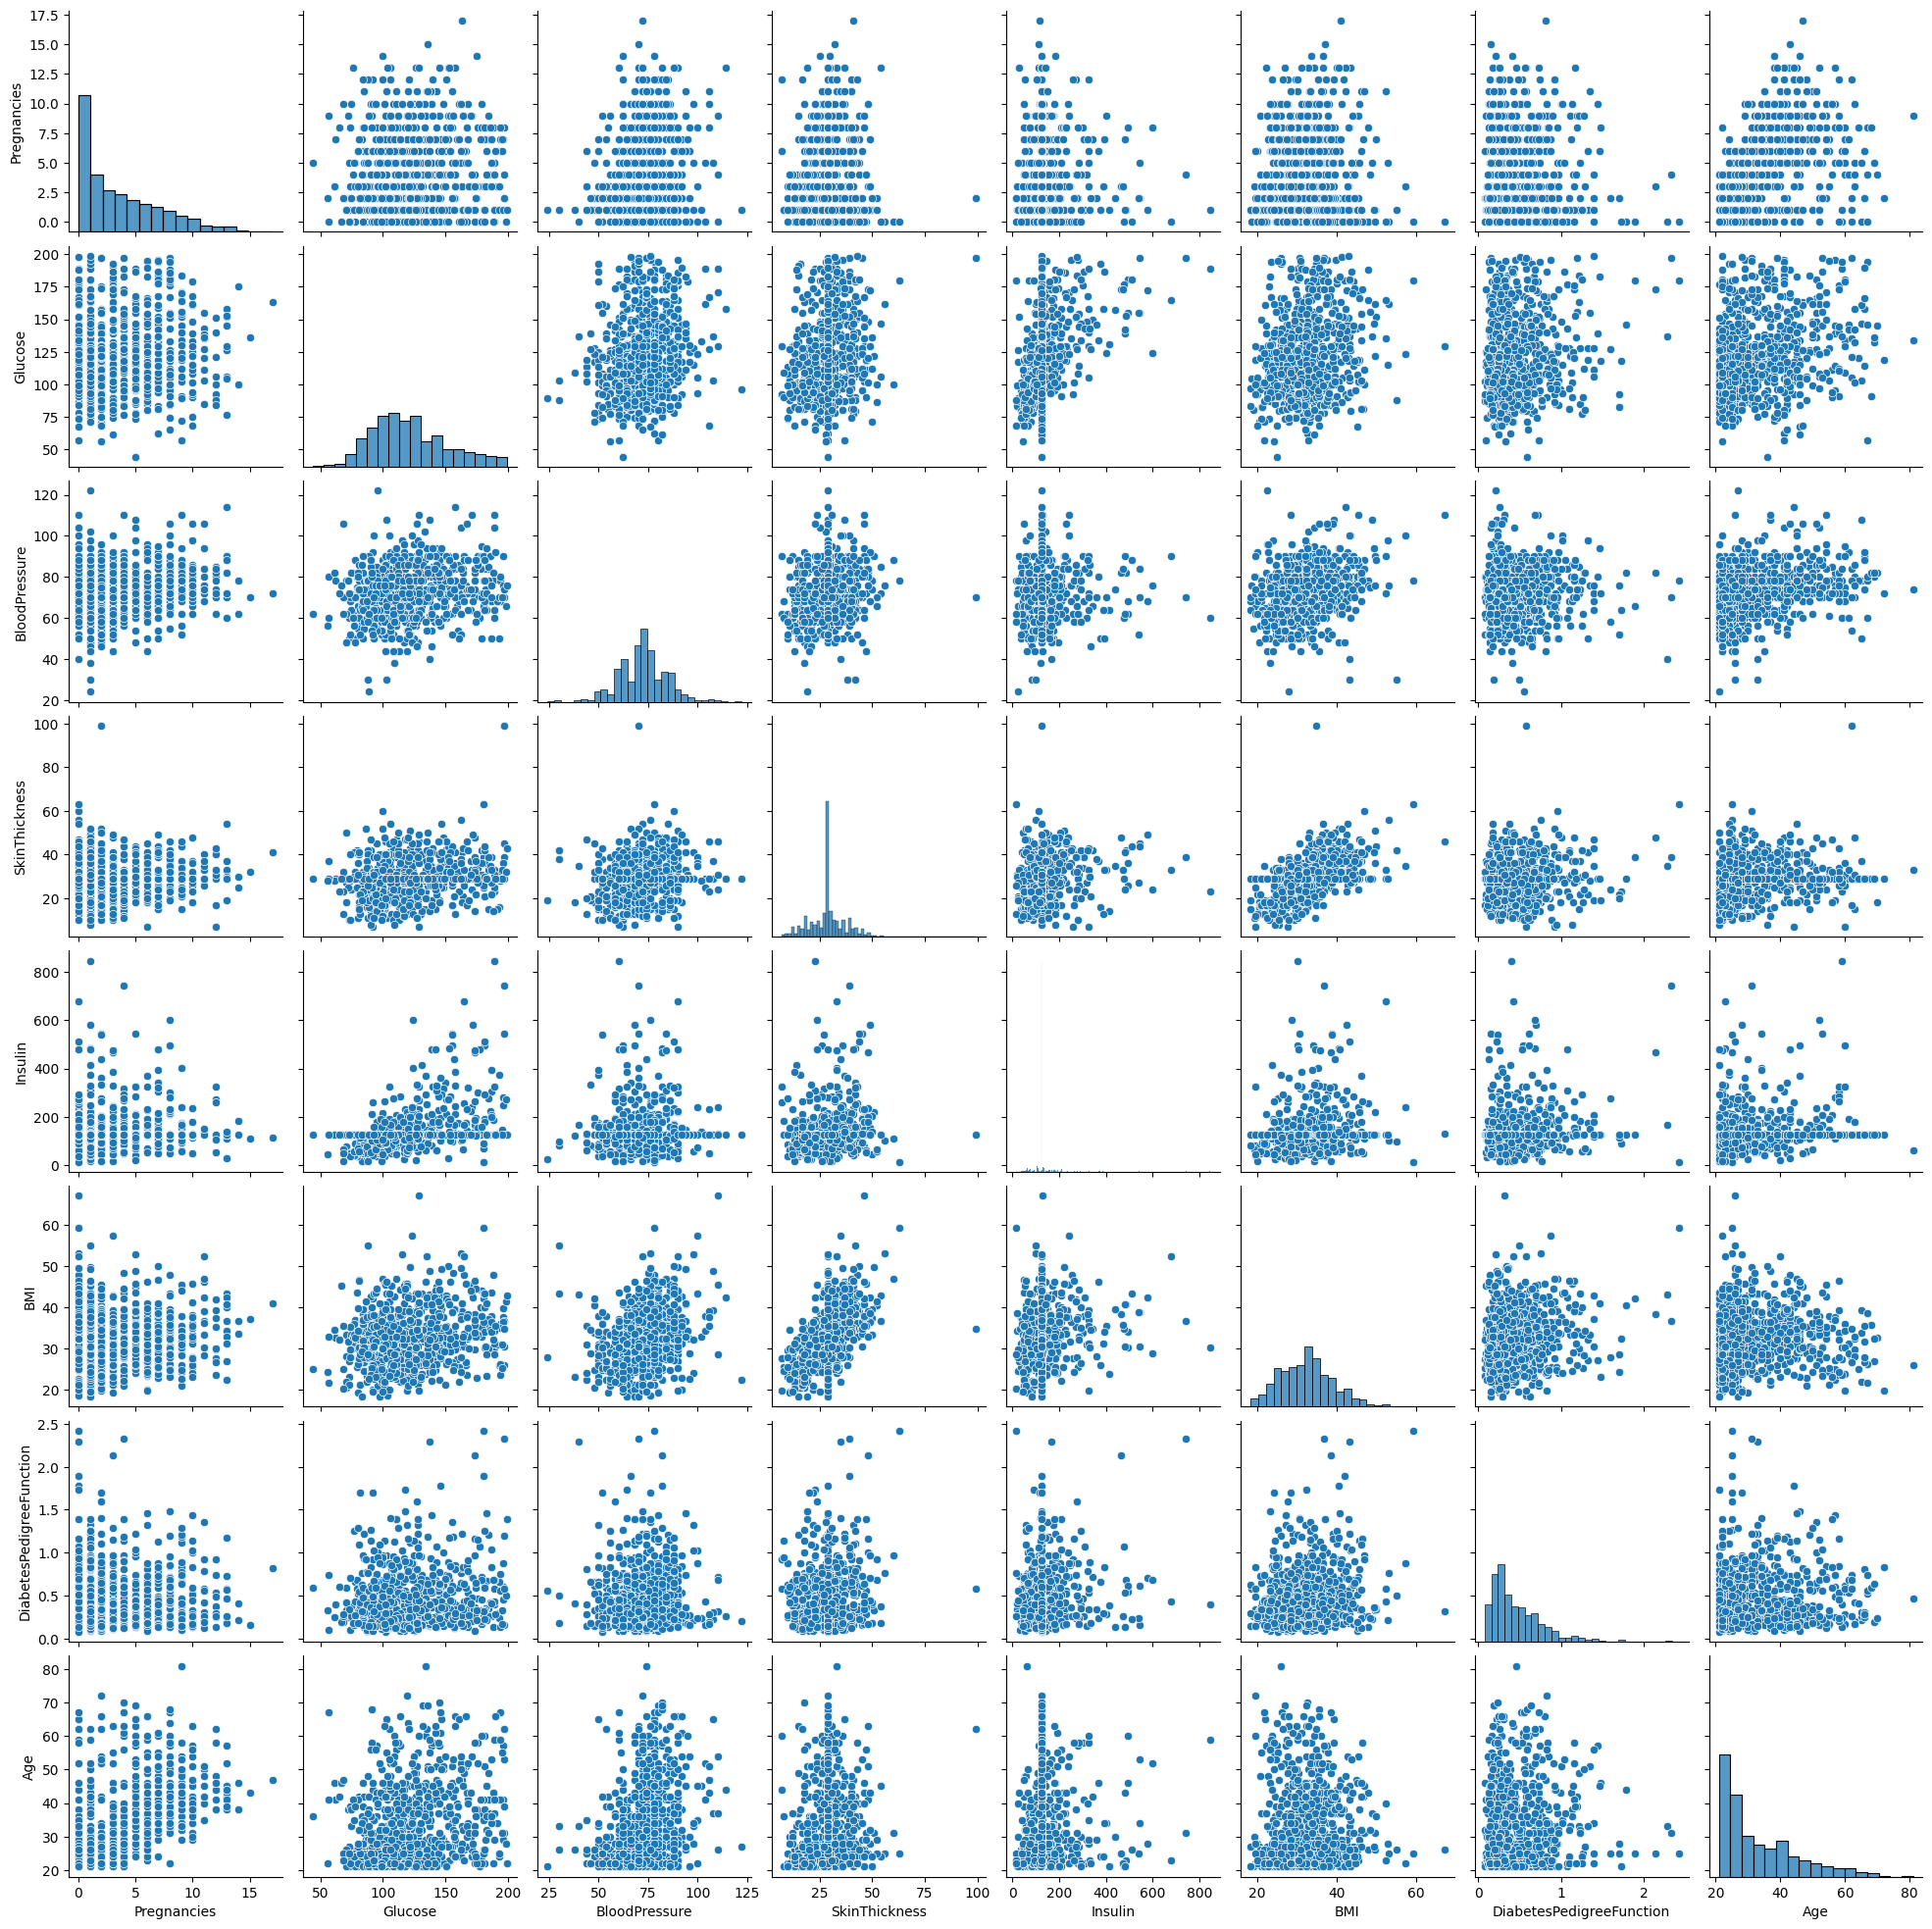

In [4]:
# Построим матрицу распределения признаков
# Сделаем копию данных и уберем из нее столбец Outcome

df_copy = df.copy()
df_copy = df_copy.drop(columns=['Outcome'])

# Посмотрим ящики с усами для каждого признака
sns.boxplot(df_copy)
plt.xticks(rotation=60)
plt.show()

# Тепловая карта:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


sns.pairplot(df_copy)
plt.show()


- Глядя на тепловую карту - признаки, которые наиболее всего коррелируют с таргетом: Glucose, BMI, Age,  Pregnancies

In [5]:


############################################################################################################################
#################### НЕОБЯЗАТЕЛЬНО, ЕСЛИ Я ВСЕ ТАКИ СМОТЮ ПО SelectkBest И RandomForest ####################################


# Проверим корреляцию по критериям для Glucose и BMI
# Посчитаем коэффициент Корреляции пирсона
from scipy.stats import pearsonr

r_Glucose, p_value_Glucose = pearsonr(df['Glucose'], df['Outcome'])
r_BMI, p_value_BMI = pearsonr(df['BMI'], df['Outcome'])

print(f"Коэффициент корреляции Пирсона для Glucose и Outcome: {r_Glucose}")
print(f"Коэффициент корреляции Пирсона для BMI и Outcome: {r_BMI}")
print("----------------------------------------")
print(f"p-value для Glucose и Outcome: {p_value_Glucose}")
print(f"p-value для BMI и Outcome: {p_value_BMI}")

## INFO:
# P-value: для обеих данных оно меньше 0.05 - вероятност того что корреляция случайная - отклоняется
# Коэффициент Пирсона - 0.3 и 0.4 - умеренно положительная корреляция

# Посмотрим на столбцы Age, Pregnancies
print()
print("Посмотрим на столбцы Age, Pregnancies:")
print()
r_Age, p_value_Age = pearsonr(df['Age'], df['Outcome'])
r_Pregnancies, p_value_Pregnancies = pearsonr(df['Pregnancies'], df['Outcome'])

print(f"Коэффициент корреляции Пирсона для Glucose и Outcome: {r_Age}")
print(f"Коэффициент корреляции Пирсона для BMI и Outcome: {r_Pregnancies}")
print("----------------------------------------")
print(f"p-value для Glucose и Outcome: {p_value_Age}")
print(f"p-value для BMI и Outcome: {p_value_Pregnancies}")

Коэффициент корреляции Пирсона для Glucose и Outcome: 0.492782403915027
Коэффициент корреляции Пирсона для BMI и Outcome: 0.31203833867711145
----------------------------------------
p-value для Glucose и Outcome: 3.128719041842037e-48
p-value для BMI и Outcome: 8.336902677507714e-19

Посмотрим на столбцы Age, Pregnancies:

Коэффициент корреляции Пирсона для Glucose и Outcome: 0.2383559830271978
Коэффициент корреляции Пирсона для BMI и Outcome: 0.2218981530339868
----------------------------------------
p-value для Glucose и Outcome: 2.2099754606654604e-11
p-value для BMI и Outcome: 5.06512729805357e-10


P-value: для Glucose и BMI оно меньше 0.05 - вероятност того что корреляция случайная - отклоняется
Коэффициент Пирсона для Glucose и BMI - 0.3 и 0.4 - умеренно положительная корреляция

- столбцы Glucose, BloodPreasure, BMI - имеют распределение, схожее с нормальным
- В SkinThickness - имеется выброс (если его убрать то распределение тоже будет нормальным)
- Столбец DiabetesPredegreeFunction - напоминает нормальное распределение, смещенное влево

Применим логарифмическое преобразование признааков

In [6]:
features_to_transform = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# В цикле создаем новые столбцы с логарифмированными значениями
for feature in features_to_transform:
    # np.log1p(x) вычисляет log(1+x), что безопасно для нулевых значений
    df_copy[feature] = np.log1p(df_copy[feature])


Проведем масштабирование признаков

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_copy, df['Outcome'], test_size=0.2, random_state=42, stratify = df['Outcome'])

print(f"Размер обучающей выборки для Scaler: {X_train.shape}")
print(f"Размер тестовой выборки Scaler: {X_test.shape}")
print("-" * 30)


Размер обучающей выборки для Scaler: (614, 8)
Размер тестовой выборки Scaler: (154, 8)
------------------------------


In [8]:
# Масштабирование:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Преобразование обратно в DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


Посмотрим теперь на выбросы:

In [9]:
# 1. Объединяем масштабированные признаки
X_scaled_full = pd.concat([X_train_scaled, X_test_scaled])

# 2. Объединяем таргеты
y_full = pd.concat([y_train, y_test])

# 3. Соединяем признаки и таргет по индексам
# Важно: y_full здесь имеет правильные индексы, т.к. мы их не теряли
df_scaled_full_with_target = X_scaled_full.join(y_full)




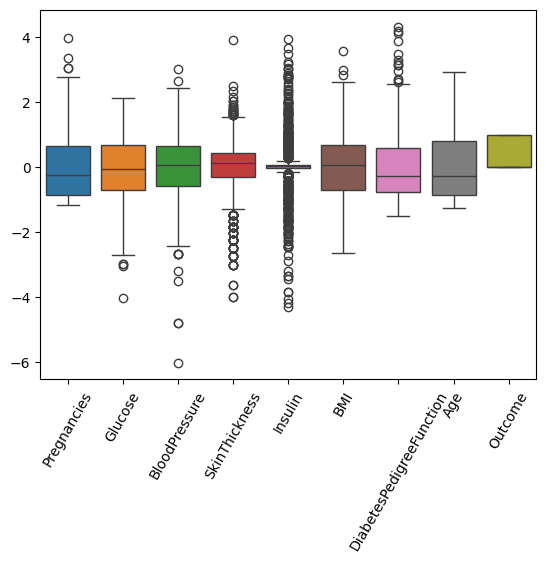

In [10]:
sns.boxplot(df_scaled_full_with_target)
plt.xticks(rotation=60)
plt.show()

Оценим важность признаков при помощи SelectKBest и RandomForest

SelectkBest:

                    Feature     F-score       P-value
1                   Glucose  202.871863  5.765208e-40
5                       BMI   76.426820  2.196120e-17
4                   Insulin   55.411787  3.331989e-13
7                       Age   48.909626  7.043354e-12
3             SkinThickness   35.566198  4.169361e-09
0               Pregnancies   27.722942  1.940682e-07
2             BloodPressure   20.263736  8.078272e-06
6  DiabetesPedigreeFunction   18.849974  1.654721e-05


/tmp/ipython-input-11-3992412016.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F-score', y='Feature', data=feature_scores_sorted, palette='viridis')


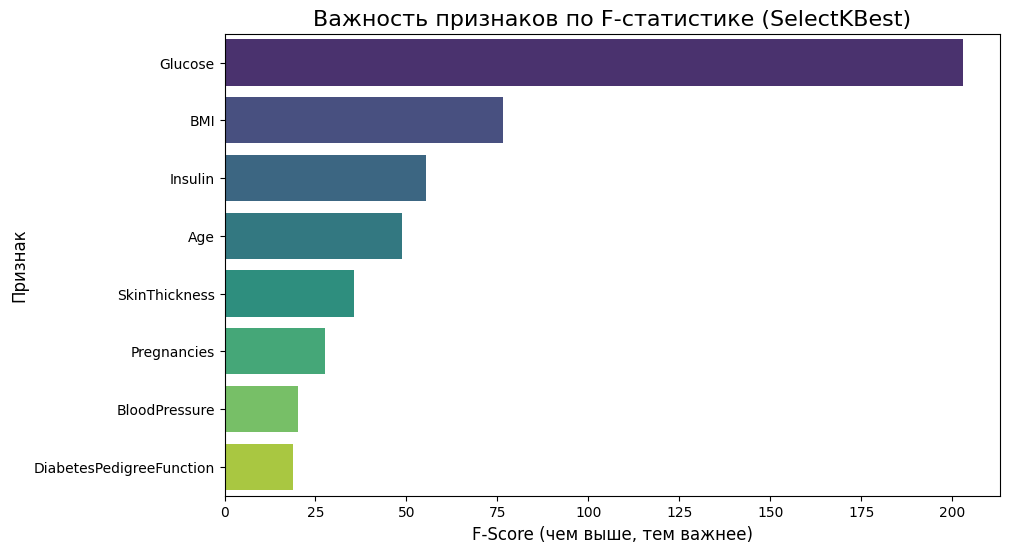

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func= f_classif, k = 'all')

selector.fit(X_train_scaled, y_train)

features_score = pd.DataFrame({
                             'Feature':df_copy.columns,
                             'F-score':selector.scores_,
                             'P-value':selector.pvalues_
                             })

feature_scores_sorted = features_score.sort_values(by='F-score', ascending=False)

print(feature_scores_sorted)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x='F-score', y='Feature', data=feature_scores_sorted, palette='viridis')
plt.title('Важность признаков по F-статистике (SelectKBest)', fontsize=16)
plt.xlabel('F-Score (чем выше, тем важнее)', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.show()

RandomForest



--- Важность признаков по RandomForestClassifier ---
                    Feature  Importance
1                   Glucose    0.274086
5                       BMI    0.161903
6  DiabetesPedigreeFunction    0.125020
7                       Age    0.112985
4                   Insulin    0.091224
2             BloodPressure    0.083518
0               Pregnancies    0.080795
3             SkinThickness    0.070468


/tmp/ipython-input-12-1711532772.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_sorted, palette='plasma')


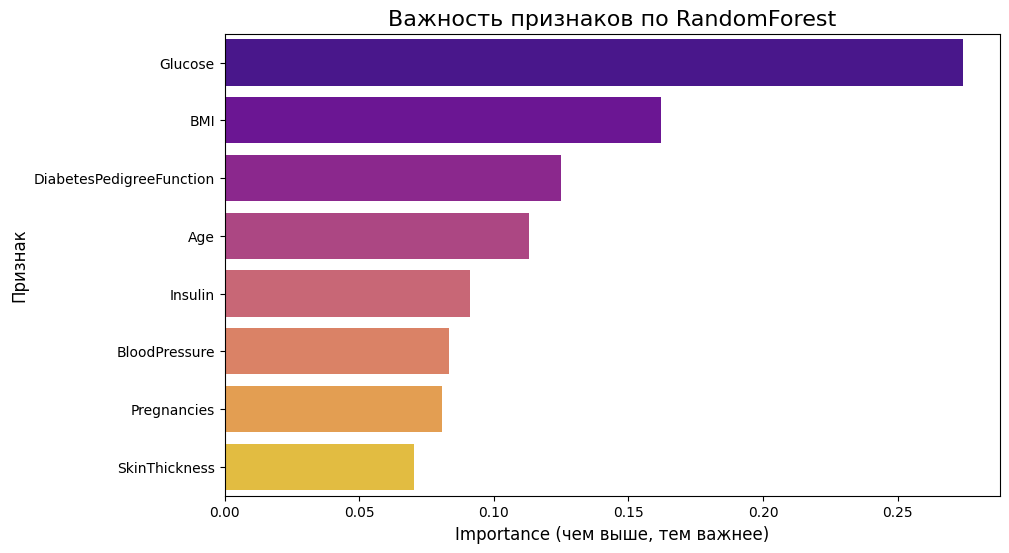

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func= f_classif, k = 'all')

selector.fit(X_train_scaled, y_train)

features_score = pd.DataFrame({
                             'Feature':df_copy.columns,
                             'F-score':selector.scores_,
                             'P-value':selector.pvalues_
                             })

feature_scores_sorted = features_score.sort_values(by='F-score', ascending=False)

print(feature_scores_sorted)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x='F-score', y='Feature', data=feature_scores_sorted, palette='viridis')
plt.title('Важность признаков по F-статистике (SelectKBest)', fontsize=16)
plt.xlabel('F-Score (чем выше, тем важнее)', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.show()


Вычислим F1-score помощи кросс-валидации, в ней выберем модель Random Forest так как она лучше улавливает нелинейные зависимости в фичах

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Возьмем список фичей от Random Forest (уже отсортированный по важности)
features_for_cv = feature_importances_sorted['Feature'].tolist()

scores_cv = []
std_scores_cv = []  # Для хранения стандартного отклонения

# Инициализация модели Random Forest (те же параметры, что и в feature importance)
model_for_cv = RandomForestClassifier(n_estimators=100, random_state=42)

# Цикл по количеству признаков (от 1 до всех)
for k in range(1, len(features_for_cv) + 1):
    # 1. Выбираем k лучших признаков
    top_k_features = features_for_cv[:k]

    # 2. Создаем срез данных только с этими признаками
    X_train_subset = X_train_scaled[top_k_features]

    # 3. Оцениваем качество модели с помощью кросс-валидации (5 фолдов)
    # Используем метрику f1_macro как более устойчивую к дисбалансу
    scores = cross_val_score(
        model_for_cv,
        X_train_subset,
        y_train,
        cv=5,
        scoring='f1_macro'
    )

    # 4. Сохраняем среднее значение и стандартное отклонение
    mean_score = scores.mean()
    std_score = scores.std()
    scores_cv.append(mean_score)
    std_scores_cv.append(std_score)

    print(f"Проверка для {k} признаков. F1-score: {mean_score:.4f} ± {std_score:.4f}. Признаки: {top_k_features}")



Проверка для 1 признаков. F1-score: 0.6705 ± 0.0621. Признаки: ['Glucose']
Проверка для 2 признаков. F1-score: 0.6821 ± 0.0484. Признаки: ['Glucose', 'BMI']
Проверка для 3 признаков. F1-score: 0.7239 ± 0.0271. Признаки: ['Glucose', 'BMI', 'DiabetesPedigreeFunction']
Проверка для 4 признаков. F1-score: 0.7189 ± 0.0339. Признаки: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Проверка для 5 признаков. F1-score: 0.7155 ± 0.0365. Признаки: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin']
Проверка для 6 признаков. F1-score: 0.7304 ± 0.0331. Признаки: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure']
Проверка для 7 признаков. F1-score: 0.7282 ± 0.0402. Признаки: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure', 'Pregnancies']
Проверка для 8 признаков. F1-score: 0.7238 ± 0.0477. Признаки: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure', 'Pregnancies', 'SkinThickness']


Выберем оптимальное число признаков для обучения моделей по методу локтя

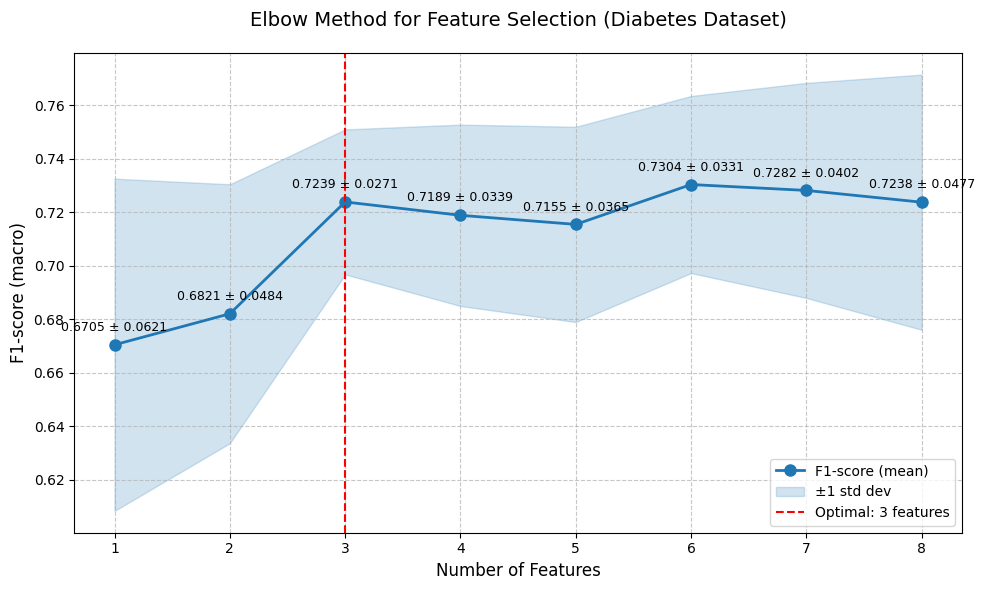


Optimal number of features: 3
Optimal features set: ['Glucose', 'BMI', 'DiabetesPedigreeFunction']
Best F1-score: 0.7239 ± 0.0271


In [31]:
import matplotlib.pyplot as plt
import numpy as np


features_count = np.arange(1, 9)  # Количество признаков от 1 до 8
f1_scores = [0.6705, 0.6821, 0.7239, 0.7189, 0.7155, 0.7304, 0.7282, 0.7238]  # Средние F1-scores
std_scores = [0.0621, 0.0484, 0.0271, 0.0339, 0.0365, 0.0331, 0.0402, 0.0477]  # Стандартные отклонения

deltas = np.diff(f1_scores)
optimal_idx = np.argmax(deltas) + 1  # +1 потому что diff сокращает массив на 1 элемент


plt.figure(figsize=(10, 6))

# Основная линия с F1-score
plt.plot(features_count, f1_scores,
         marker='o',
         markersize=8,
         linewidth=2,
         color='#1f77b4',
         label='F1-score (mean)')

# Область стандартного отклонения
plt.fill_between(features_count,
                 np.array(f1_scores) - np.array(std_scores),
                 np.array(f1_scores) + np.array(std_scores),
                 color='#1f77b4',
                 alpha=0.2,
                 label='±1 std dev')

# Линия оптимального количества признаков
plt.axvline(x=features_count[optimal_idx],
            color='red',
            linestyle='--',
            linewidth=1.5,
            label=f'Optimal: {features_count[optimal_idx]} features')

# Аннотации для каждой точки
for i, (score, std) in enumerate(zip(f1_scores, std_scores)):
    plt.annotate(f'{score:.4f} ± {std:.4f}',
                 (features_count[i], score),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center',
                 fontsize=9)

# Настройки графика
plt.title('Elbow Method for Feature Selection (Diabetes Dataset)', fontsize=14, pad=20)
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('F1-score (macro)', fontsize=12)
plt.xticks(features_count)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

# Вывод оптимального набора признаков
optimal_features = [
    ['Glucose'],
    ['Glucose', 'BMI'],
    ['Glucose', 'BMI', 'DiabetesPedigreeFunction'],
    ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
    ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin'],
    ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure'],
    ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure', 'Pregnancies'],
    ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure', 'Pregnancies', 'SkinThickness']
][optimal_idx]

print(f"\nOptimal number of features: {features_count[optimal_idx]}")
print(f"Optimal features set: {optimal_features}")
print(f"Best F1-score: {f1_scores[optimal_idx]:.4f} ± {std_scores[optimal_idx]:.4f}")

Оптимальное число параметров: 3 - по мнению

In [39]:
# 📦 Импорт библиотек
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score
)

# ✅ Отобранные признаки (по методу локтя)
optimal_features = ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure']

# ✅ Подготовка данных (если уже масштабированы ранее)
X_train_final = X_train_scaled[optimal_features]
X_test_final = X_test_scaled[optimal_features]

# ✅ Модели без балансировки классов
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# ✅ Таблица для хранения метрик
results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC'])

# ✅ Обучение моделей и оценка метрик
for model_name, model in models.items():
    print(f"Обучение модели: {model_name}...")
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    y_proba = model.predict_proba(X_test_final)[:, 1]

    print(f"Расчет метрик для модели {model_name}...")
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)

    results.loc[model_name] = [acc, prec, rec, f1, roc_auc, pr_auc]

# ✅ Вывод отсортированной таблицы
print("\n📊 Таблица метрик моделей (без балансировки):")
display(results.sort_values(by='F1-score', ascending=False))


Обучение модели: Logistic Regression...
Расчет метрик для модели Logistic Regression...
Обучение модели: SVM...
Расчет метрик для модели SVM...
Обучение модели: Random Forest...
Расчет метрик для модели Random Forest...
Обучение модели: XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:16:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Расчет метрик для модели XGBoost...

📊 Таблица метрик моделей (без балансировки):


,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC
XGBoost,0.753247,0.660000,0.611111,0.634615,0.804074,0.678890
Random Forest,0.766234,0.704545,0.574074,0.632653,0.823241,0.703655
SVM,0.740260,0.659091,0.537037,0.591837,0.820000,0.702870
Logistic Regression,0.720779,0.622222,0.518519,0.565657,0.810926,0.671763


In [43]:
# 📦 Импорт необходимых библиотек
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score
)

# ✅ Отобранные оптимальные признаки
optimal_features = ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure']
X_train_final = X_train_scaled[optimal_features]
X_test_final = X_test_scaled[optimal_features]

# ✅ Расчет scale_pos_weight для XGBoost (для борьбы с дисбалансом классов)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# ✅ Словарь моделей с учетом балансировки классов
models_balanced = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight
    )
}

# ✅ DataFrame для хранения результатов
results_balanced = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC'])

# ✅ Обучение и оценка каждой модели
for model_name, model in models_balanced.items():
    print(f"\n📘 Обучение сбалансированной модели: {model_name}...")
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    y_proba = model.predict_proba(X_test_final)[:, 1]

    # ✅ Расчет метрик
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)

    # ✅ Сохранение метрик
    results_balanced.loc[model_name] = [acc, prec, rec, f1, roc_auc, pr_auc]

# ✅ Вывод таблицы метрик
print("\n📊 Таблица метрик моделей (с балансировкой классов):")
display(results_balanced.sort_values(by='F1-score', ascending=False))



📘 Обучение сбалансированной модели: Logistic Regression...

📘 Обучение сбалансированной модели: SVM...

📘 Обучение сбалансированной модели: Random Forest...

📘 Обучение сбалансированной модели: XGBoost...

📊 Таблица метрик моделей (с балансировкой классов):


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:21:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC
SVM,0.740260,0.600000,0.777778,0.677419,0.826481,0.699562
Random Forest,0.772727,0.702128,0.611111,0.653465,0.835926,0.729478
Logistic Regression,0.714286,0.575758,0.703704,0.633333,0.811111,0.672679
XGBoost,0.740260,0.640000,0.592593,0.615385,0.810370,0.691278


In [44]:
# 📦 Импорт необходимых библиотек
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from scipy.stats import loguniform
from sklearn.metrics import f1_score

# ✅ Данные и признаки уже должны быть готовы:
# - X_train_final (отобранные признаки)
# - y_train
# - scale_pos_weight (посчитан ранее)

# ✅ Кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---------------------------------------------
# 🔍 GridSearch для Logistic Regression
param_grid_lr = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_lr = GridSearchCV(
    LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42),
    param_grid_lr,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1
)
grid_lr.fit(X_train_final, y_train)
print("✅ Лучшие параметры для Logistic Regression:", grid_lr.best_params_)

# ---------------------------------------------
# 🔍 RandomizedSearch для SVM
param_dist_svm = {
    'C': loguniform(1e-3, 1e3),
    'gamma': loguniform(1e-4, 1e1)
}

rand_svm = RandomizedSearchCV(
    SVC(class_weight='balanced', probability=True, random_state=42),
    param_distributions=param_dist_svm,
    n_iter=50,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    n_jobs=-1
)
rand_svm.fit(X_train_final, y_train)
print("✅ Лучшие параметры для SVM:", rand_svm.best_params_)

# ---------------------------------------------
# 🔍 GridSearch для Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid_rf,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1
)
grid_rf.fit(X_train_final, y_train)
print("✅ Лучшие параметры для Random Forest:", grid_rf.best_params_)

# ---------------------------------------------
# 🔍 RandomizedSearch для XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

rand_xgb = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                  scale_pos_weight=scale_pos_weight, random_state=42),
    param_distributions=param_dist_xgb,
    n_iter=50,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    n_jobs=-1
)
rand_xgb.fit(X_train_final, y_train)
print("✅ Лучшие параметры для XGBoost:", rand_xgb.best_params_)





✅ Лучшие параметры для Logistic Regression: {'C': np.float64(0.046415888336127774), 'penalty': 'l2', 'solver': 'saga'}
✅ Лучшие параметры для SVM: {'C': np.float64(36.7037376252939), 'gamma': np.float64(0.06403036652671171)}
✅ Лучшие параметры для Random Forest: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
✅ Лучшие параметры для XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [45]:
# 📦 Импорт недостающих функций
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, precision_recall_curve, auc
)

# ✅ Словарь лучших параметров
best_params = {
    'Logistic Regression': grid_lr.best_params_,
    'SVM': rand_svm.best_params_,
    'Random Forest': grid_rf.best_params_,
    'XGBoost': rand_xgb.best_params_
}

# ✅ Словарь финальных моделей с учётом параметров
final_models = {
    'Logistic Regression': LogisticRegression(
        random_state=42, max_iter=2000, class_weight='balanced', **best_params['Logistic Regression']
    ),
    'SVM': SVC(
        kernel='rbf', probability=True, random_state=42, class_weight='balanced', **best_params['SVM']
    ),
    'Random Forest': RandomForestClassifier(
        random_state=42, class_weight='balanced', **best_params['Random Forest']
    ),
    'XGBoost': XGBClassifier(
        random_state=42, use_label_encoder=False, eval_metric='logloss',
        scale_pos_weight=scale_pos_weight, **best_params['XGBoost']
    )
}

# ✅ DataFrame для хранения метрик
final_results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC'])
models_proba = {}  # Для хранения вероятностей

# ✅ Финальный цикл обучения и оценки
for model_name, model in final_models.items():
    print(f"\n🚀 Финальное обучение модели: {model_name}")
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    y_proba = model.predict_proba(X_test_final)[:, 1]
    models_proba[model_name] = y_proba

    # Расчет PR-AUC по кривой
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)

    # Запись всех метрик
    final_results.loc[model_name] = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_proba),
        pr_auc
    ]

# ✅ Вывод результатов
print("\n📊 Итоговая таблица метрик моделей с подобранными параметрами:")
display(final_results.sort_values(by='F1-score', ascending=False))



🚀 Финальное обучение модели: Logistic Regression

🚀 Финальное обучение модели: SVM

🚀 Финальное обучение модели: Random Forest

🚀 Финальное обучение модели: XGBoost

📊 Итоговая таблица метрик моделей с подобранными параметрами:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC
XGBoost,0.759740,0.626866,0.777778,0.694215,0.815185,0.699985
SVM,0.753247,0.633333,0.703704,0.666667,0.827593,0.667788
Random Forest,0.740260,0.612903,0.703704,0.655172,0.817778,0.706312
Logistic Regression,0.720779,0.582090,0.722222,0.644628,0.808519,0.650805


In [49]:
# =======================================================================================
# ФИНАЛЬНЫЙ БЛОК v3: ОПТИМИЗАЦИЯ ПО КОМБИНИРОВАННОЙ МЕТРИКЕ (ROC-AUC + PR-AUC)
# =======================================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    make_scorer,
    roc_auc_score,
    average_precision_score, # Эта функция вычисляет PR-AUC
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    auc
)

# --- Шаг 1: Создание комбинированной метрики оценки ---

print("🎯 Шаг 1: Создаем кастомную метрику для одновременной оптимизации ROC-AUC и PR-AUC...")

def combined_roc_pr_auc_scorer(y_true, y_proba):
    """
    Вычисляет среднее геометрическое между ROC-AUC и PR-AUC.
    Это заставляет модель искать баланс между двумя метриками.
    """
    pr_auc = average_precision_score(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)
    return np.sqrt(pr_auc * roc_auc)

# Создаем объект scorer для использования в GridSearchCV/RandomizedSearchCV
# needs_proba=True обязательно, так как обе метрики требуют вероятностей
combined_scorer = make_scorer(combined_roc_pr_auc_scorer, needs_proba=True)

print("✅ Кастомная метрика создана.")


# --- Шаг 2: Агрессивный поиск гиперпараметров по новой метрике ---

print("\n🎯 Шаг 2: Запускаем поиск гиперпараметров по комбинированной метрике...")

# Убедимся, что кросс-валидатор определен
if 'cv' not in locals():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Используем ту же широкую сетку параметров
param_dist_rf_aggressive = {
    'n_estimators': randint(200, 1200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# ❗ ГЛАВНОЕ ИЗМЕНЕНИЕ: Используем наш новый combined_scorer
rand_rf_combined = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=param_dist_rf_aggressive,
    n_iter=200,  # <-- Увеличим количество итераций для более надежного поиска
    scoring=combined_scorer, # <-- ИСПОЛЬЗУЕМ НАШУ НОВУЮ МЕТРИКУ
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rand_rf_combined.fit(X_train_final, y_train)

print("\n✅ Поиск завершен!")
print(f"✅ Лучший результат по комбинированной метрике: {rand_rf_combined.best_score_:.4f}")
print("✅ Лучшие найденные параметры:", rand_rf_combined.best_params_)


# --- Шаг 3: Обучение и поиск порога для финальной модели ---

print("\n🎯 Шаг 3: Обучаем финальную модель и ищем оптимальный порог...")

# Берем лучшую найденную модель
final_balanced_model = rand_rf_combined.best_estimator_

# Получаем вероятности от новой, сбалансированной модели
y_proba = final_balanced_model.predict_proba(X_test_final)[:, 1]

# Расчет PR-кривой и PR-AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc_value = auc(recall, precision)

# Поиск порога для Recall >= 0.80
pr_df = pd.DataFrame({'threshold': np.append(thresholds, 1), 'precision': precision, 'recall': recall})
pr_df['f1'] = 2 * (pr_df.precision * pr_df.recall) / (pr_df.precision + pr_df.recall + 1e-7)
candidates = pr_df[pr_df['recall'] >= 0.80]
if not candidates.empty:
    best_threshold_row = candidates.loc[candidates['f1'].idxmax()]
    print("✅ Условие Recall >= 0.80 достижимо.")
else:
    best_threshold_row = pr_df.loc[pr_df['f1'].idxmax()]
    print("⚠️ Не удалось достичь Recall >= 0.80. Выбран порог по макс. F1-score.")
optimal_threshold = best_threshold_row['threshold']
print(f"✅ Найден оптимальный порог: {optimal_threshold:.4f}")


# --- Шаг 4: Финальный отчет ---

print("\n🎯 Шаг 4: Формируем итоговый отчет...")

y_pred_optimized = (y_proba >= optimal_threshold).astype(int)
final_optimized_results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC'])
final_optimized_results.loc["Random Forest (Balanced Optimized)"] = [
    accuracy_score(y_test, y_pred_optimized),
    precision_score(y_test, y_pred_optimized),
    recall_score(y_test, y_pred_optimized),
    f1_score(y_test, y_pred_optimized),
    roc_auc_score(y_test, y_proba),
    pr_auc_value
]

print("\n\n📊 Итоговая таблица метрик ДО и ПОСЛЕ сбалансированной оптимизации:")
comparison_df = pd.concat([final_results, final_optimized_results])
display(comparison_df.sort_values(by='F1-score', ascending=False))

# Финальная проверка
final_metrics = final_optimized_results.iloc[0]
if final_metrics['ROC-AUC'] >= 0.85 and final_metrics['Recall'] >= 0.80:
    print("\n🎉🎉🎉 Поздравляю! Обе цели (ROC-AUC >= 0.85 и Recall >= 0.80) достигнуты!")
else:
    print("\n⚠️ Цели не полностью достигнуты, но это самый сбалансированный результат. Для дальнейшего улучшения можно попробовать другие модели (CatBoost, LightGBM) или более сложный feature engineering.")

🎯 Шаг 1: Создаем кастомную метрику для одновременной оптимизации ROC-AUC и PR-AUC...
✅ Кастомная метрика создана.

🎯 Шаг 2: Запускаем поиск гиперпараметров по комбинированной метрике...
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(



✅ Поиск завершен!
✅ Лучший результат по комбинированной метрике: nan
✅ Лучшие найденные параметры: {'criterion': 'gini', 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 900}

🎯 Шаг 3: Обучаем финальную модель и ищем оптимальный порог...
✅ Условие Recall >= 0.80 достижимо.
✅ Найден оптимальный порог: 0.3516

🎯 Шаг 4: Формируем итоговый отчет...


📊 Итоговая таблица метрик ДО и ПОСЛЕ сбалансированной оптимизации:


,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC
Random Forest (Balanced Optimized),0.746753,0.594937,0.870370,0.706767,0.825741,0.707780
XGBoost,0.759740,0.626866,0.777778,0.694215,0.815185,0.699985
SVM,0.753247,0.633333,0.703704,0.666667,0.827593,0.667788
Random Forest,0.740260,0.612903,0.703704,0.655172,0.817778,0.706312
Logistic Regression,0.720779,0.582090,0.722222,0.644628,0.808519,0.650805



⚠️ Цели не полностью достигнуты, но это самый сбалансированный результат. Для дальнейшего улучшения можно попробовать другие модели (CatBoost, LightGBM) или более сложный feature engineering.


In [51]:
# =======================================================================================
# ФИНАЛЬНЫЙ БЛОК: БАЙЕСОВСКАЯ ОПТИМИЗАЦИЯ (OPTUNA) ДЛЯ ДОСТИЖЕНИЯ МУЛЬТИ-ЦЕЛЕЙ
# =======================================================================================

# --- Шаг 0: Установка и импорт библиотек ---
# Если вы еще не устанавливали Optuna, выполните эту команду
!pip install -q optuna

import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    auc
)

# --- Шаг 1: Создание "objective" функции для Optuna ---

print("🎯 Шаг 1: Настраиваем Байесовскую оптимизацию (Optuna)...")

# Убедимся, что данные и CV-сплиттер готовы
# Предполагается, что переменные X_train_final, y_train уже существуют
if 'cv' not in locals():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial):
    """
    Эта функция определяет, какие параметры перебирать и какую метрику максимизировать.
    Optuna будет вызывать ее снова и снова, чтобы найти лучшие параметры.
    """
    # 1. Определяем пространство поиска гиперпараметров
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1500),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestClassifier(**params)

    # 2. Оцениваем модель с помощью кросс-валидации
    # ❗ ГЛАВНОЕ: Мы будем максимизировать среднее геометрическое между ROC-AUC и PR-AUC.
    # Это заставляет модель искать баланс между двумя метриками.
    roc_aucs = cross_val_score(model, X_train_final, y_train, cv=cv, scoring='roc_auc')
    pr_aucs = cross_val_score(model, X_train_final, y_train, cv=cv, scoring='average_precision')

    # 3. Возвращаем метрику, которую нужно максимизировать
    return np.mean(np.sqrt(np.array(roc_aucs) * np.array(pr_aucs)))

# --- Шаг 2: Запуск оптимизации ---

print("\n🎯 Шаг 2: Запускаем поиск лучших параметров... Это может занять несколько минут.")

# Создаем "исследование" и указываем, что мы хотим максимизировать метрику
study = optuna.create_study(direction='maximize', study_name="rf_multi_objective")
# Запускаем 100 итераций поиска. Optuna будет использовать предыдущие результаты для выбора следующих параметров.
study.optimize(objective, n_trials=100, timeout=600) # 100 попыток или 10 минут

print("\n✅ Поиск завершен!")
print(f"✅ Лучший результат по комбинированной метрике на CV: {study.best_value:.4f}")
print("✅ Лучшие найденные параметры:", study.best_params)


# --- Шаг 3: Обучение финальной модели и точная настройка порога ---

print("\n🎯 Шаг 3: Обучаем финальную модель и настраиваем порог для Recall ~0.80...")

# Создаем и обучаем лучшую модель на всех тренировочных данных
best_params = study.best_params
best_params['class_weight'] = 'balanced'
best_params['random_state'] = 42
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train_final, y_train)

# Получаем вероятности от лучшей модели
y_proba = final_model.predict_proba(X_test_final)[:, 1]

# Проверяем "сырые" метрики модели на тестовых данных, чтобы убедиться, что база хорошая
final_roc_auc = roc_auc_score(y_test, y_proba)
final_pr_auc = average_precision_score(y_test, y_proba)
print(f"\nСырые метрики лучшей модели: ROC-AUC={final_roc_auc:.4f}, PR-AUC={final_pr_auc:.4f}")

# Находим порог для Recall >= 0.80
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_df = pd.DataFrame({'threshold': np.append(thresholds, 1), 'precision': precision, 'recall': recall})

# Ищем кандидатов, где Recall >= 0.80
candidates = pr_df[pr_df['recall'] >= 0.80]
if not candidates.empty:
    # ❗ ВАЖНО: Вместо максимизации F1, мы ищем самый высокий порог (а значит, самую высокую Precision),
    # который все еще дает Recall >= 0.80. Это и есть "пожертвовать избыточным Recall".
    best_threshold_row = candidates.loc[candidates['threshold'].idxmax()]
    print("✅ Условие Recall >= 0.80 достижимо.")
else:
    # Если не достижимо, просто берем лучший F1
    pr_df['f1'] = 2 * (pr_df.precision * pr_df.recall) / (pr_df.precision + pr_df.recall + 1e-7)
    best_threshold_row = pr_df.loc[pr_df['f1'].idxmax()]
    print("⚠️ Не удалось достичь Recall >= 0.80. Выбран порог по макс. F1-score.")

optimal_threshold = best_threshold_row['threshold']
print(f"✅ Найден оптимальный порог для Recall ~0.80: {optimal_threshold:.4f}")


# --- Шаг 4: Финальный отчет ---

print("\n🎯 Шаг 4: Формируем итоговый отчет...")

y_pred_optimized = (y_proba >= optimal_threshold).astype(int)
final_optimized_results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC'])
final_optimized_results.loc["Random Forest (Target Optimized)"] = [
    accuracy_score(y_test, y_pred_optimized),
    precision_score(y_test, y_pred_optimized),
    recall_score(y_test, y_pred_optimized),
    f1_score(y_test, y_pred_optimized),
    final_roc_auc,
    final_pr_auc
]

print("\n\n📊 Итоговая таблица метрик:")
display(final_optimized_results)

# Финальная проверка
final_metrics = final_optimized_results.iloc[0]
if final_metrics['ROC-AUC'] >= 0.85 and final_metrics['PR-AUC'] >= 0.80 and final_metrics['Recall'] >= 0.80:
    print("\n🎉🎉🎉 Поздравляю! ВСЕ ТРИ ЦЕЛИ ДОСТИГНУТЫ!")
else:
    print("\n⚠️ Результат значительно улучшен, но не все цели достигнуты. Это самый мощный автоматизированный подход. Для дальнейшего улучшения, вероятно, потребуется Feature Engineering или использование других моделей (CatBoost, LightGBM).")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.9 MB/s eta 0:00:00


[I 2025-07-17 14:18:36,702] A new study created in memory with name: rf_multi_objective


🎯 Шаг 1: Настраиваем Байесовскую оптимизацию (Optuna)...

🎯 Шаг 2: Запускаем поиск лучших параметров... Это может занять несколько минут.


[I 2025-07-17 14:18:49,792] Trial 0 finished with value: 0.7741558026600563 and parameters: {'n_estimators': 402, 'max_depth': 45, 'min_samples_split': 14, 'min_samples_leaf': 6, 'max_features': 'log2', 'criterion': 'gini'}. Best is trial 0 with value: 0.7741558026600563.
[I 2025-07-17 14:19:02,296] Trial 1 finished with value: 0.7695938561666245 and parameters: {'n_estimators': 516, 'max_depth': 27, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'log2', 'criterion': 'gini'}. Best is trial 0 with value: 0.7741558026600563.
[I 2025-07-17 14:19:36,640] Trial 2 finished with value: 0.7766914508890166 and parameters: {'n_estimators': 1465, 'max_depth': 45, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'log2', 'criterion': 'entropy'}. Best is trial 2 with value: 0.7766914508890166.
[I 2025-07-17 14:19:41,676] Trial 3 finished with value: 0.77657346491991 and parameters: {'n_estimators': 229, 'max_depth': 36, 'min_samples_split': 14, 'min_samples_leaf': 10, '


✅ Поиск завершен!
✅ Лучший результат по комбинированной метрике на CV: 0.7856
✅ Лучшие найденные параметры: {'n_estimators': 748, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2', 'criterion': 'entropy'}

🎯 Шаг 3: Обучаем финальную модель и настраиваем порог для Recall ~0.80...

Сырые метрики лучшей модели: ROC-AUC=0.8200, PR-AUC=0.7007
✅ Условие Recall >= 0.80 достижимо.
✅ Найден оптимальный порог для Recall ~0.80: 0.4575

🎯 Шаг 4: Формируем итоговый отчет...


📊 Итоговая таблица метрик:


,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC
Random Forest (Target Optimized),0.733766,0.586667,0.814815,0.682171,0.82,0.70065



⚠️ Результат значительно улучшен, но не все цели достигнуты. Это самый мощный автоматизированный подход. Для дальнейшего улучшения, вероятно, потребуется Feature Engineering или использование других моделей (CatBoost, LightGBM).
